In [1]:
# import major libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# additional libraries
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing dataset
df = pd.read_csv('Magicbricks.csv')

### Data Assessing

In [3]:
# overview data

df.head()

Area  BHK  Bathroom Furnishing    Location       District  \
0   950.0    2       2.0  Furnished  Karol Bagh  Central Delhi   
1   535.0    2       1.0  Furnished  Karol Bagh  Central Delhi   
2  1280.0    3       3.0  Furnished  Karol Bagh  Central Delhi   
3  1135.0    3       3.0  Furnished  Karol Bagh  Central Delhi   
4  1135.0    3       3.0  Furnished  Karol Bagh  Central Delhi   

                                            Locality  Parking         Status  \
0  DDA MIG Flats Prasad Nagar Phase 2, Prasad Nag...      1.0  Ready_to_move   
1                              Dev Nagar, Karol Bagh      1.0  Ready_to_move   
2                                         Karol Bagh      2.0  Ready_to_move   
3                          The Amaryllis, Karol Bagh      2.0   Almost_ready   
4                          The Amaryllis, Karol Bagh      2.0   Almost_ready   

    Transaction           Type  Per_Sqft     Price  
0        Resale      Apartment    8761.0  12500000  
1  New_Property      Apartment    7290.0   3900000  
2        Resale  Builder_Floor   14092.0  15000000  
3        Resale      Apartment   22222.0  25000000  
4        Resale      Apartment   22222.0  25000000

In [4]:
df.shape

(1214, 13)

# Data Card

A dataset contain 1214 rows and have columns

## Types of Error:

- **completeness**
- **Validity** --> dtypes(example: no of chirldren in float), duplicacy issue(example:patient_id), salary(-10000), age in negative
- **Accuracy** --> body weight (13kg of adult), age 190
- **Inconsistency** --> new york city, nyc

## Types of Data 

- **Dirty data** --> completeness validdity accuracy inconsistency
- **Messy Data** --> structural issues --> exapmle : pivot tables, sparsity issue

In [5]:
# seeking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1214 entries, 0 to 1213
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1214 non-null   float64
 1   BHK          1214 non-null   int64  
 2   Bathroom     1212 non-null   float64
 3   Furnishing   1214 non-null   object 
 4   Location     1214 non-null   object 
 5   District     1214 non-null   object 
 6   Locality     1214 non-null   object 
 7   Parking      1182 non-null   float64
 8   Status       1214 non-null   object 
 9   Transaction  1214 non-null   object 
 10  Type         1209 non-null   object 
 11  Per_Sqft     973 non-null    float64
 12  Price        1214 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 123.4+ KB


- the dataset contains null values indicating completeness issue.
- bathroom and parking columns are stored at float thought they represent counts -- a validity error.
- the dataset includes 6 numerical columns and 7 categorical (object-type) column requring proper preprocessing before analysis.

In [6]:
# seeking description
df.describe()

Area          BHK     Bathroom      Parking       Per_Sqft  \
count   1214.000000  1214.000000  1212.000000  1182.000000     973.000000   
mean    1451.850751     2.778418     2.523927     1.708122   15574.885920   
std     1586.472855     0.946811     1.017723     5.717177   21574.389007   
min       28.000000     1.000000     1.000000     1.000000    1259.000000   
25%      800.000000     2.000000     2.000000     1.000000    6154.000000   
50%     1150.000000     3.000000     2.000000     1.000000   10838.000000   
75%     1620.000000     3.000000     3.000000     2.000000   17647.000000   
max    24300.000000    10.000000     7.000000   114.000000  183333.000000   

              Price  
count  1.214000e+03  
mean   2.079898e+07  
std    2.561308e+07  
min    1.000000e+06  
25%    5.600000e+06  
50%    1.400000e+07  
75%    2.500000e+07  
max    2.400000e+08

- points
- Accuracy --> min-value of area 28 sqft dicy and max 24300 sqft


In [7]:
# COMPLETENESS
df.isnull().sum().sum()
# percentage
df.isnull().mean()*100

Area            0.000000
BHK             0.000000
Bathroom        0.164745
Furnishing      0.000000
Location        0.000000
District        0.000000
Locality        0.000000
Parking         2.635914
Status          0.000000
Transaction     0.000000
Type            0.411862
Per_Sqft       19.851730
Price           0.000000
dtype: float64

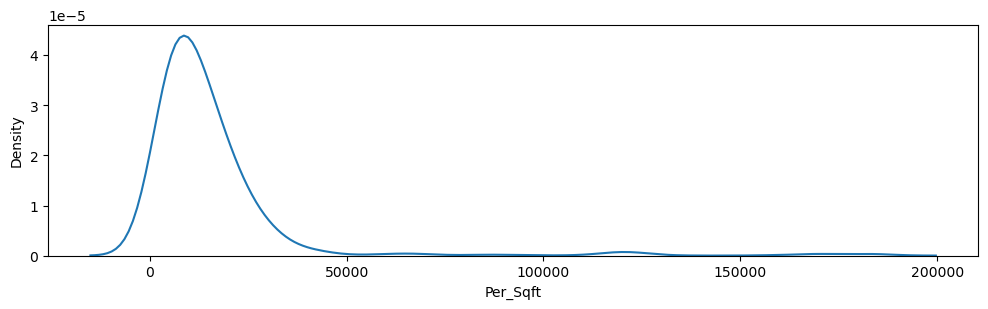

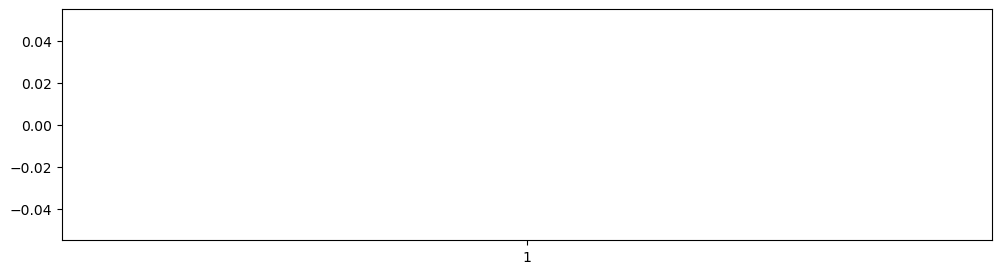

skewness 5.264871991245157


In [8]:
df.Per_Sqft.describe()
# VISUALIZATION
plt.figure(figsize=(12,3))
sns.kdeplot(data=df, x='Per_Sqft')
plt.show()
plt.figure(figsize=(12,3))
plt.boxplot(data=df, x='Per_Sqft')
plt.show()

print('skewness',df.Per_Sqft.skew())

<Axes: title={'center': 'immputing'}, xlabel='Per_Sqft'>

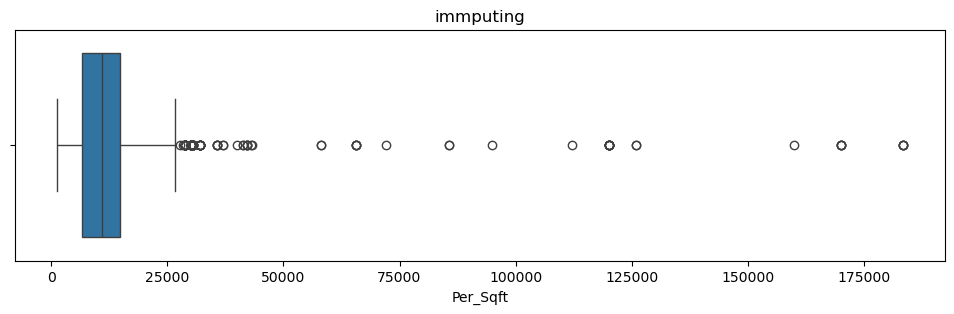

In [9]:
plt.figure(figsize=(12,3))
plt.title('immputing')
sns.boxplot(x=df.Per_Sqft.fillna(df.Per_Sqft.median()))

In [10]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Location', 'District',
       'Locality', 'Parking', 'Status', 'Transaction', 'Type', 'Per_Sqft',
       'Price'],
      dtype='object')

In [11]:
df.Per_Sqft = df.Per_Sqft.fillna(df.Price/df.Area)

In [12]:
df.Per_Sqft.isnull().sum()

np.int64(0)

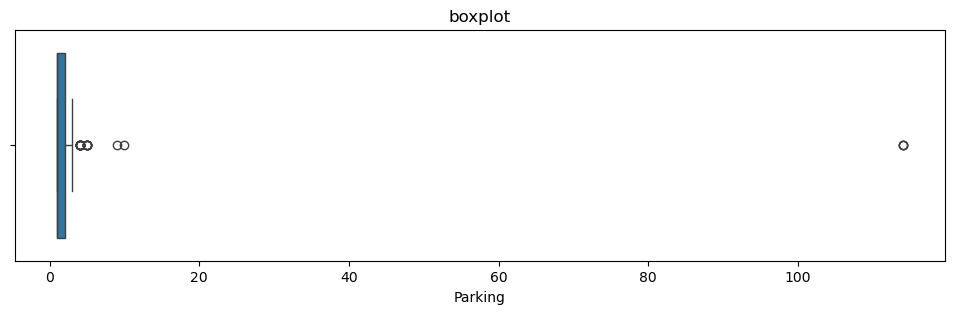

In [13]:
# outlier
plt.figure(figsize=(12,3))
plt.title('boxplot') 
sns.boxplot(x=df.Parking)
plt.show()

In [14]:
df[df.Parking>100]

df.Parking = np.where(df.Parking>100,1,df.Parking)

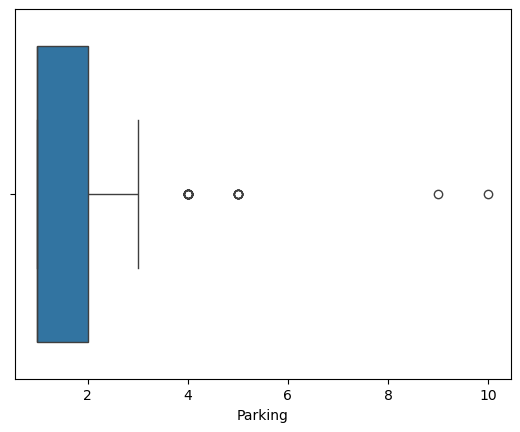

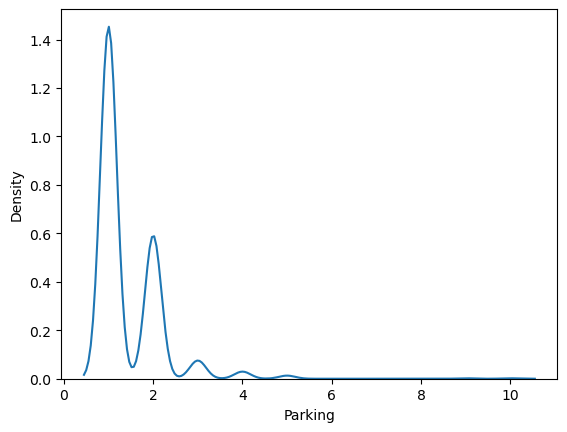

In [15]:
sns.boxplot(x=df.Parking)
plt.show()
sns.kdeplot(x=df.Parking)
plt.show()

In [16]:
df.Parking = df.Parking.fillna(1)
df.Parking = df.Parking.astype(int)
df.Parking.sample(5)

233    1
220    1
845    1
475    1
180    1
Name: Parking, dtype: int64

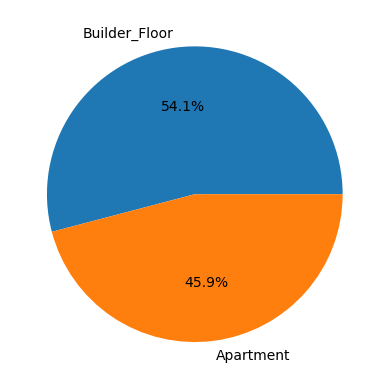

Type  count
0  Builder_Floor    654
1      Apartment    555

In [17]:
# Type
df.isnull().sum()
temp = df.Type.value_counts().reset_index()
plt.pie(temp['count'],labels=temp.Type,autopct='%1.1f%%')
plt.show()
temp

In [18]:
df.Type.fillna('Builder_Floor',inplace=True)
df.Type.mode().values

array(['Builder_Floor'], dtype=object)

In [19]:
df.isnull().sum().sum()

np.int64(2)

In [20]:
df.dropna(inplace=True)

In [21]:
df.shape

(1212, 13)

In [22]:
# numerical columns
# categorical columns
df.columns
num = list(df.describe().columns)
cat = []
for i in df.columns:
    if i not in num:
        cat.append(i)

print('numerical\t',num)
print('categorical\t',cat)

numerical	 ['Area', 'BHK', 'Bathroom', 'Parking', 'Per_Sqft', 'Price']
categorical	 ['Furnishing', 'Location', 'District', 'Locality', 'Status', 'Transaction', 'Type']


In [24]:
# univariate analysis

### Potential issue

In [25]:
df[df.Area>10000]

Area  BHK  Bathroom      Furnishing           Location     District  \
429  22050.0    4       4.0  Semi-Furnished    Greater Kailash  South Delhi   
431  22050.0    4       4.0  Semi-Furnished    Greater Kailash  South Delhi   
515  10350.0    4       7.0  Semi-Furnished     Friends Colony  South Delhi   
603  24300.0    4       5.0  Semi-Furnished              Saket  South Delhi   
806  14220.0    3       3.0  Semi-Furnished      Paschim Vihar   West Delhi   
835  17010.0    3       3.0  Semi-Furnished       Punjabi Bagh   West Delhi   
978  11050.0    3       3.0     Unfurnished  Chittaranjan Park  South Delhi   

                              Locality  Parking         Status   Transaction  \
429                  Greater Kailash 1        2   Almost_ready  New_Property   
431                  Greater Kailash 1        2   Almost_ready  New_Property   
515  Maharani Bagh, New Friends Colony        3  Ready_to_move  New_Property   
603                              Saket        2  Ready_to_move        Resale   
806             Paschim Vihar Block B4        1  Ready_to_move  New_Property   
835                  Punjabi Bagh West        2  Ready_to_move        Resale   
978                  Chittaranjan Park        1  Ready_to_move  New_Property   

              Type  Per_Sqft      Price  
429  Builder_Floor   30556.0   51000000  
431  Builder_Floor   30556.0   51000000  
515      Apartment   15459.0  160000000  
603  Builder_Floor   12500.0   51000000  
806  Builder_Floor   10943.0   27500000  
835  Builder_Floor   15278.0   25000000  
978  Builder_Floor   12916.0   18500000

In [26]:
22050.0*30556.0

673759800.0

In [27]:
(673759800.0/51000000)/10

1.3210976470588236

In [28]:
df.Area = np.where(df.Area>10000,df.Area/10,df.Area)

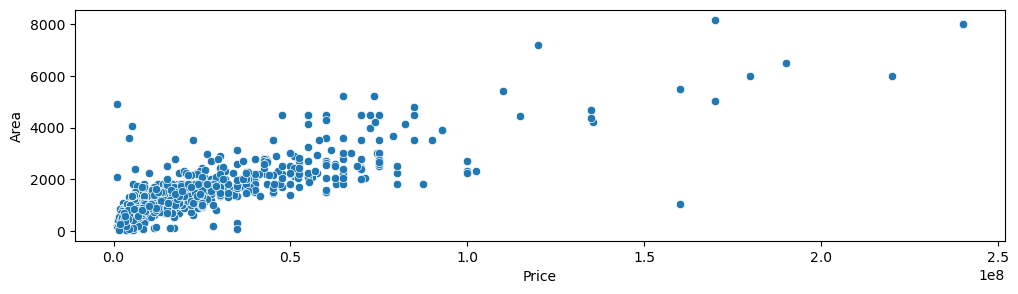

In [29]:
# bivariate analysis
plt.figure(figsize=(12,3))
sns.scatterplot(data=df,x='Price',y='Area')
plt.show()

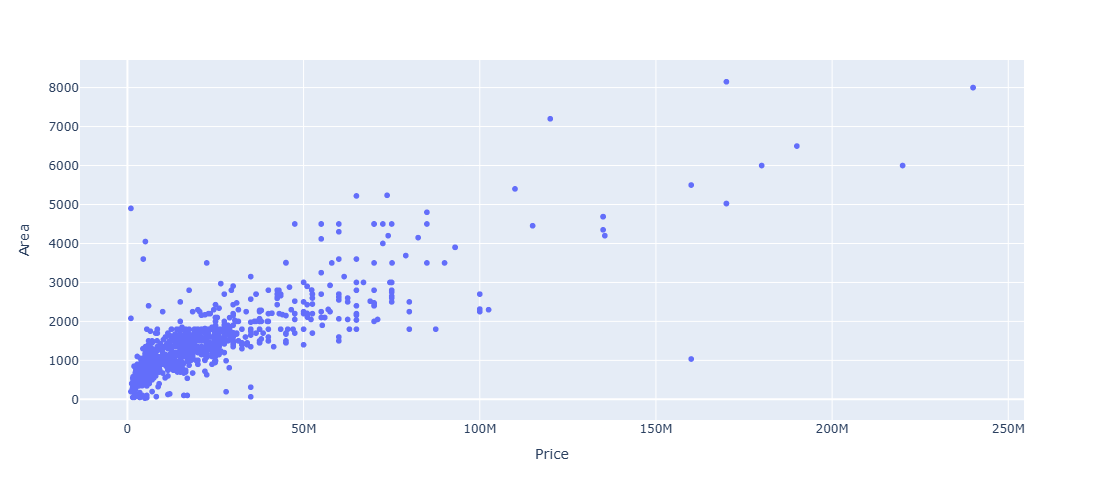

In [30]:
# plotly

px.scatter(df,x='Price',y='Area',hover_data=['Area','Location','Price'],height=500)

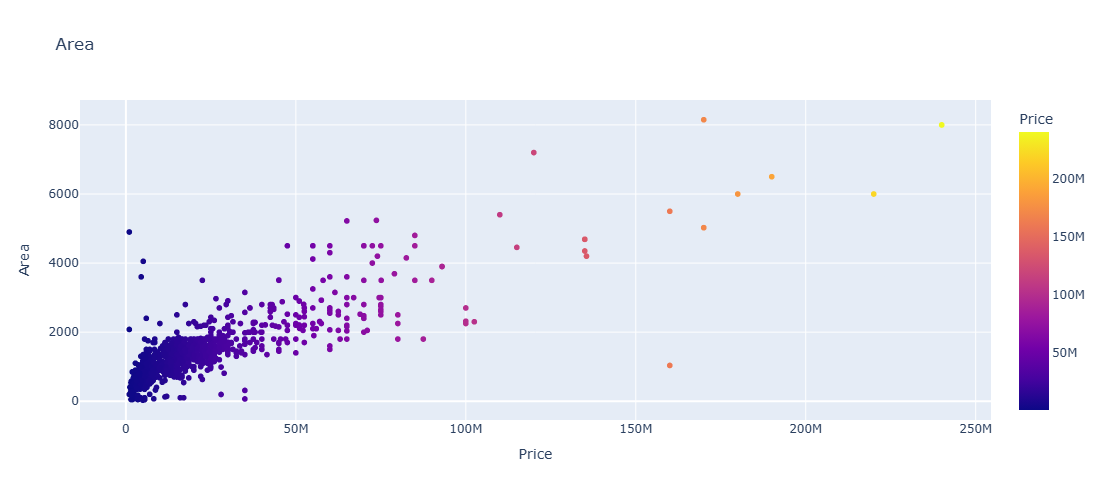

In [31]:
# plotly

px.scatter(df,x='Price',y='Area',
           hover_data=['Area','Location','Price'],height=500,color='Price',title='Area')

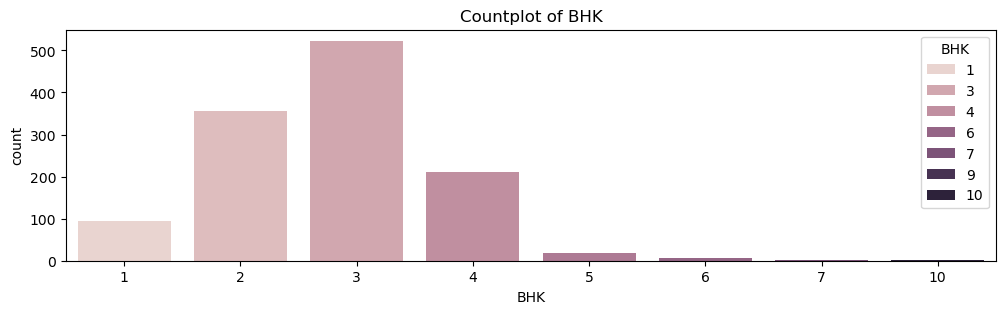

In [32]:
# univariate analysis

# bhk
plt.figure(figsize=(12,3))
sns.countplot(data=df,x='BHK',hue='BHK')
plt.title('Countplot of BHK')
temp = df.BHK.value_counts().reset_index().head()
temp
px.pie(temp,names='BHK',values='count',
       color_discrete_sequence = px.colors.sequential.Blues,
       height=400,title='Distribution of BHK')


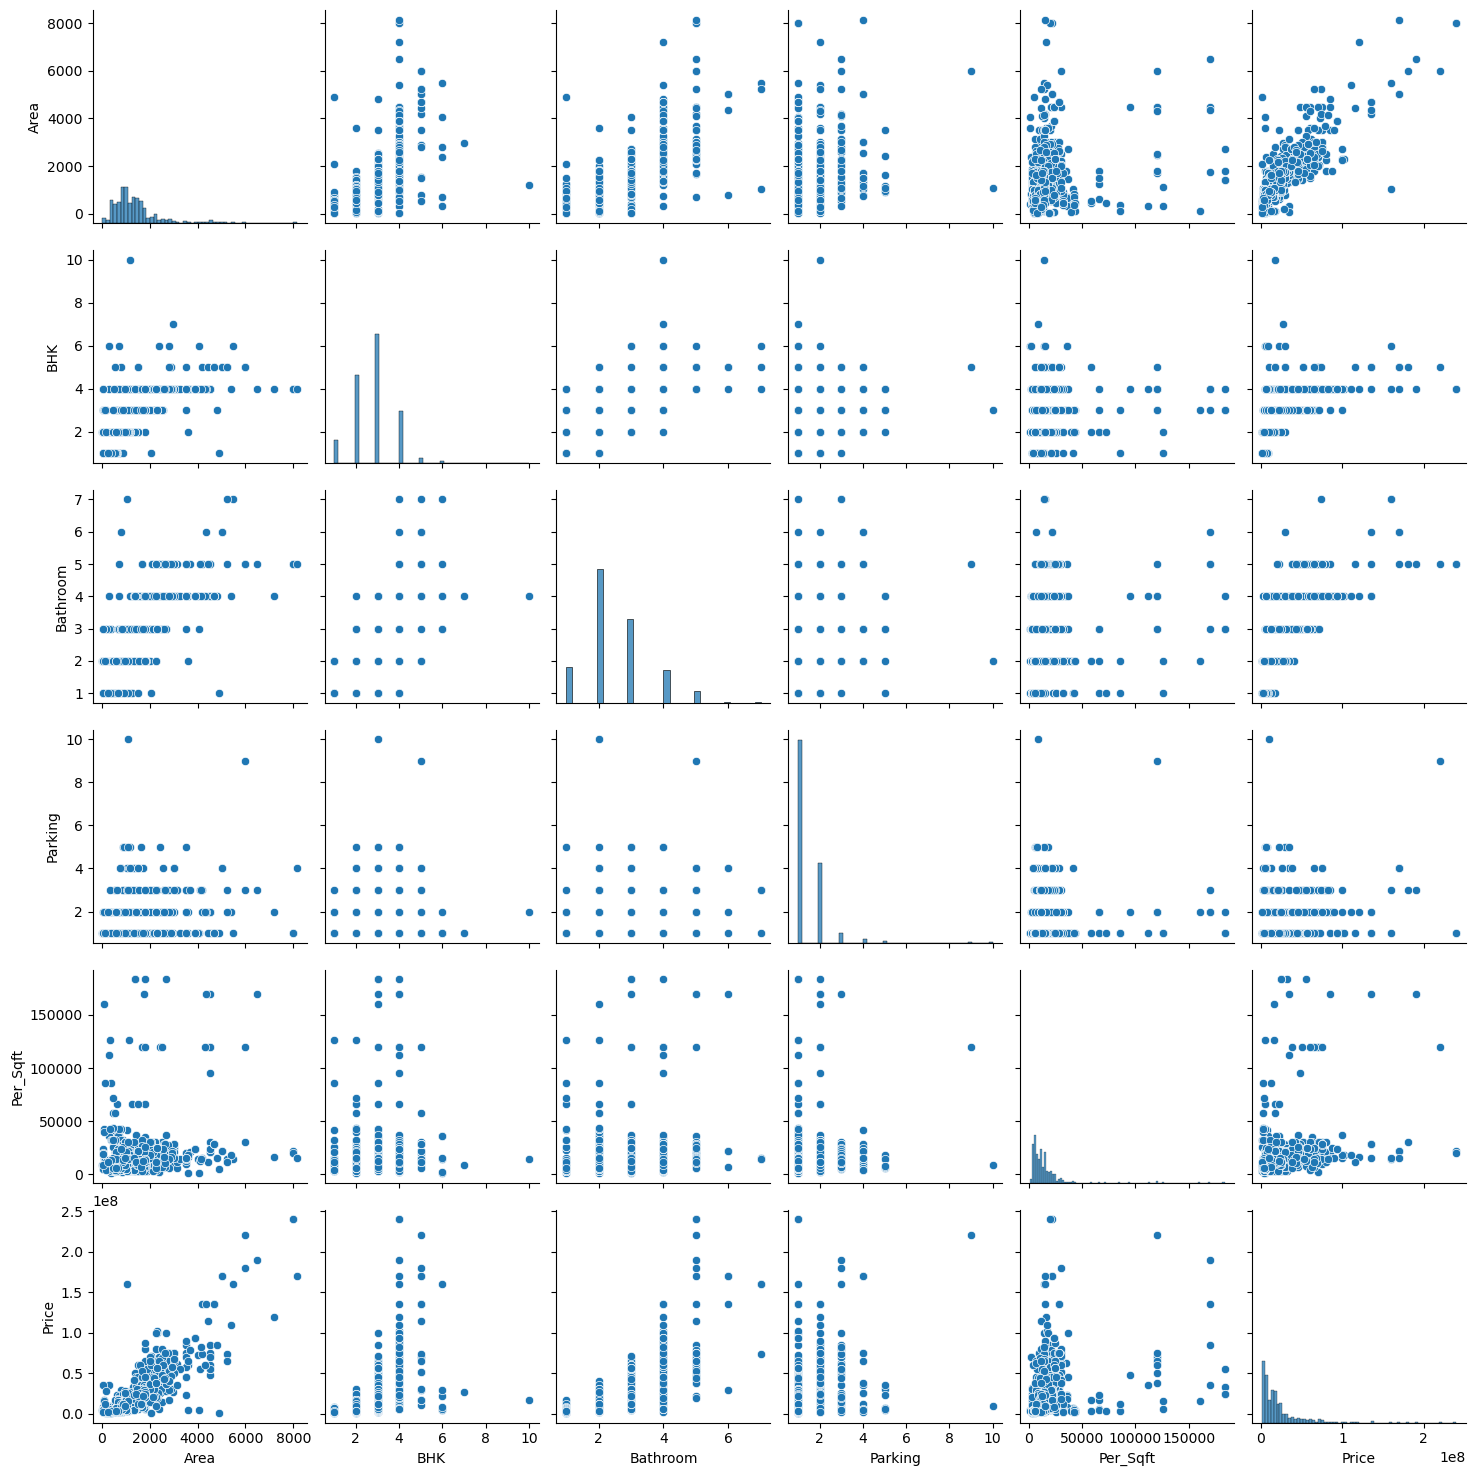

In [33]:
# multivariate analysis

sns.pairplot(df)

<Axes: >

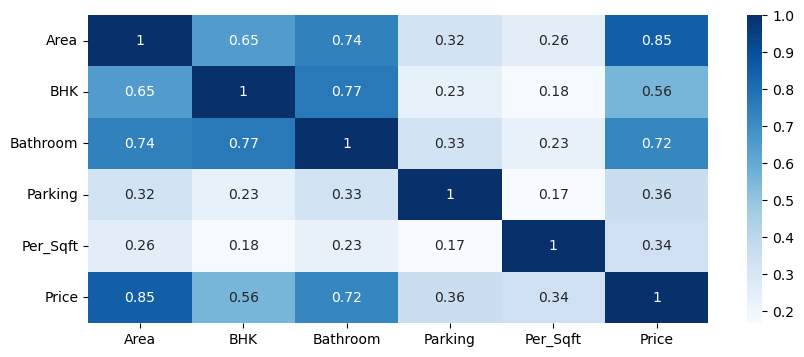

In [38]:
# corr
# heat map
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(numeric_only=True),cmap='Blues',annot=True)

In [39]:
df.District.value_counts().reset_index()

District  count
0        South Delhi    457
1         West Delhi    150
2         East Delhi    135
3   North West Delhi    122
4   South West Delhi     95
5  South West Delhi      87
6           Shahdara     75
7   South East Delhi     59
8      Central Delhi     32

In [45]:
df.District = df.District.str.strip()

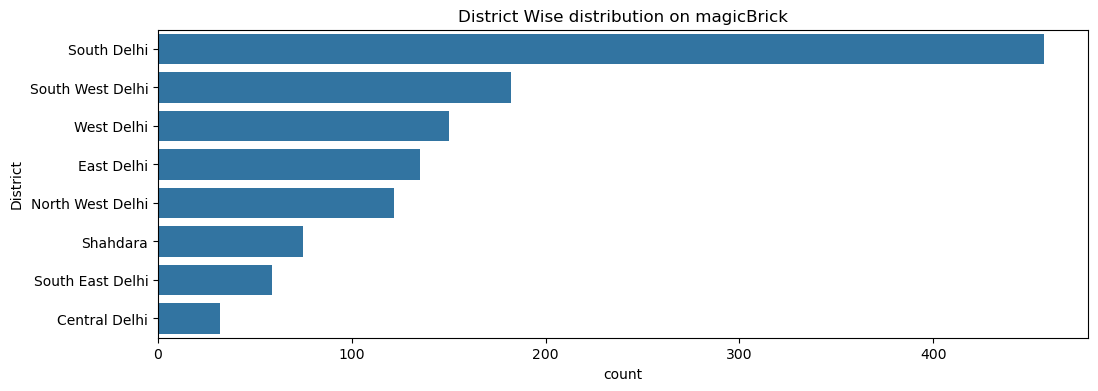

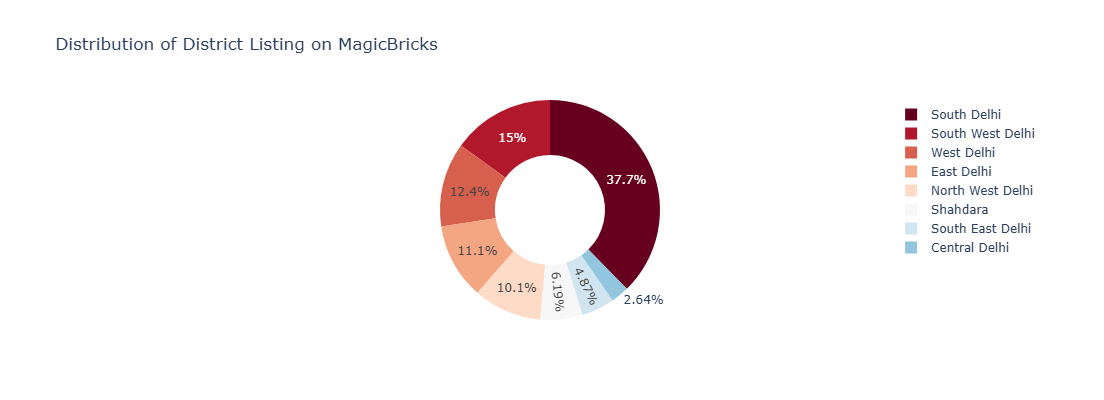

District  count
0       South Delhi    457
1  South West Delhi    182
2        West Delhi    150
3        East Delhi    135
4  North West Delhi    122
5          Shahdara     75
6  South East Delhi     59
7     Central Delhi     32

In [46]:
temp = df.District.value_counts().reset_index()
plt.figure(figsize=(12,4))
sns.countplot(data=df,y='District',order=temp.District)
plt.title('District Wise distribution on magicBrick')
plt.show()

px.pie(temp,values='count',names='District',height=400,
       color_discrete_sequence=px.colors.sequential.RdBu,hole=0.5,
       title='Distribution of District Listing on MagicBricks').show()
temp

In [47]:
# location
# price
# bivariate analysis

df.loc[:,['Location','Price']].sample(5)

Location     Price
183      Karol Bagh  24000000
1131      Sultanpur   4500000
428   Malviya Nagar  57500000
766          Dwarka   6800000
234      Vasundhara  16500000

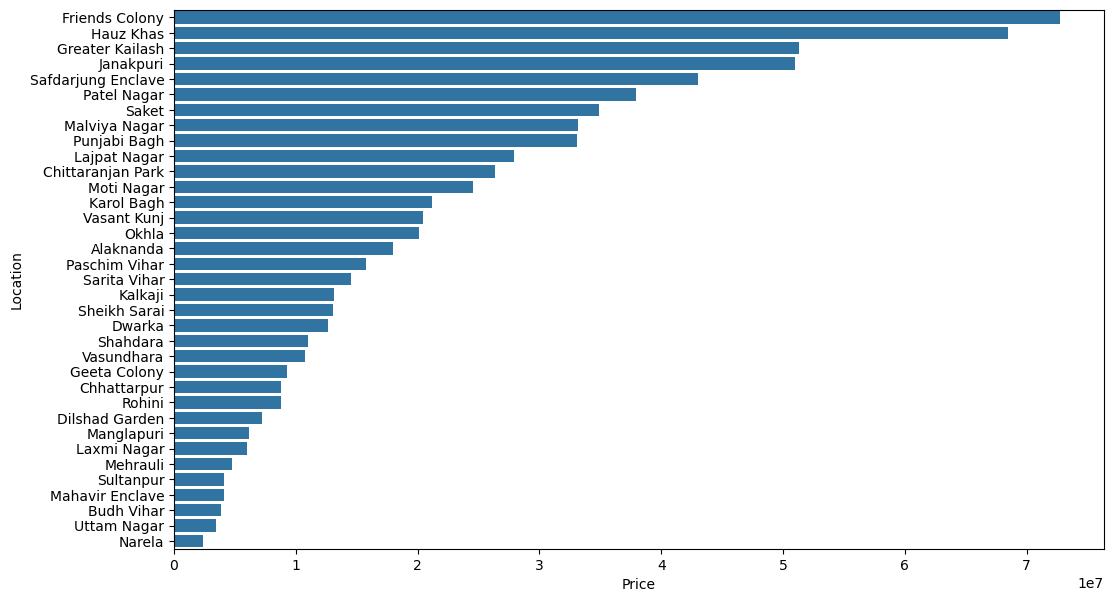

In [48]:
temp = df.groupby('Location')['Price'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,7))
sns.barplot(data=df,y='Location',x='Price',
            ci=False,order = temp.Location)
plt.show()

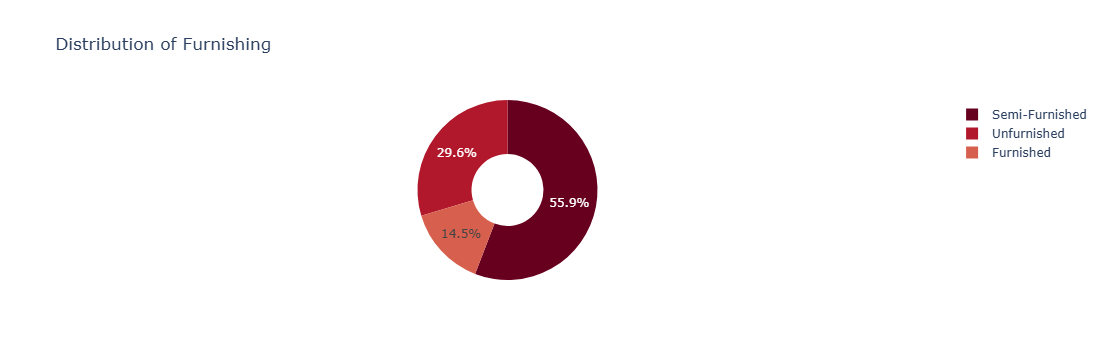

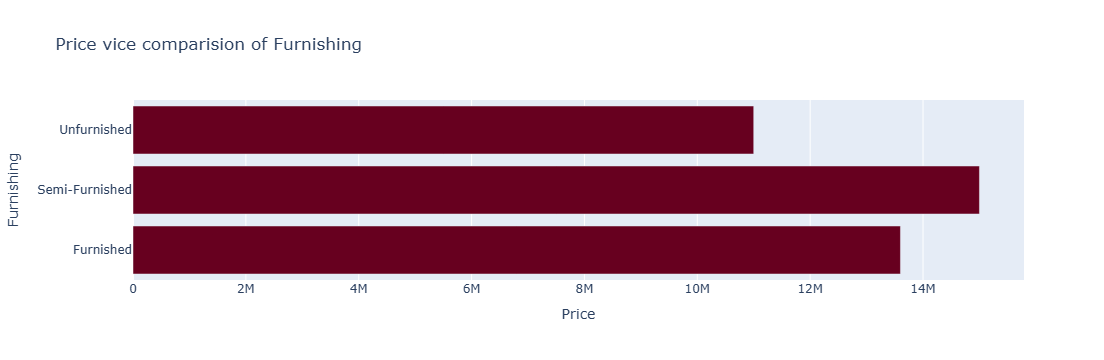

In [54]:
temp = df.Furnishing.value_counts().reset_index()

px.pie(temp,names = 'Furnishing'
       ,values='count',title='Distribution of Furnishing',hole=0.4,
       color_discrete_sequence=px.colors.sequential.RdBu).show()

temp2 = df.groupby('Furnishing')['Price'].median().reset_index()

px.bar(temp2, x='Price',y='Furnishing',title='Price vice comparision of Furnishing',
       color_discrete_sequence=px.colors.sequential.RdBu).show()

# Conclusion

The MagicBrick data analysis conducted using Python highlights the effectiveness of data-driven techniques in extracting meaningful insights from complex datasets. Through systematic data cleaning, transformation, and exploratory analysis, the dataset was refined to ensure accuracy, consistency, and reliability. Visualization and statistical summaries enabled the identification of key patterns, trends, and anomalies, supporting clearer interpretation and informed decision-making. Overall, the Python-based analysis establishes a robust analytical foundation for the MagicBrick project, enabling scalable modeling, performance optimization, and future integration of advanced techniques such as predictive analytics and machine learning.